<a href="https://colab.research.google.com/github/gomescheelsy03/INST-414-0101-/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Default Prediction – Supervised Learning (Classification)

**Question:** Can we predict whether a loan applicant will default on their loan based on their financial and demographic information?

**Stakeholder:** The loan approval and risk team at a financial institution, who want to identify high-risk borrowers before approving a loan so they can make safer lending decisions and reduce financial losses.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/Loan_default.csv')

# Quick checks
print("Shape:", df.shape)
display(df.head())
df.info()
df['Default'].value_counts()
df['Default'].value_counts(normalize=True)


Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

,proportion
Default,
0,0.883872
1,0.116128


In [3]:
if 'LoanID' in df.columns:
    df = df.drop(columns=['LoanID'])

print("Missing values per column:")
print(df.isna().sum())

df = df.dropna()
print("New shape after dropping missing:", df.shape)

numeric_cols = [
    'Age', 'Income', 'LoanAmount', 'CreditScore',
    'MonthsEmployed', 'NumCreditLines', 'InterestRate',
    'LoanTerm', 'DTIRatio'
]

categorical_cols = [
    'Education', 'EmploymentType', 'MaritalStatus',
    'HasMortgage', 'HasDependents', 'LoanPurpose',
    'HasCoSigner'
]

print("Numeric columns found:", [c for c in numeric_cols if c in df.columns])
print("Categorical columns found:", [c for c in categorical_cols if c in df.columns])


Missing values per column:
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
New shape after dropping missing: (255347, 17)
Numeric columns found: ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
Categorical columns found: ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


In [4]:
from sklearn.model_selection import train_test_split

# Features (X) and label (y)
X = df[numeric_cols + categorical_cols]
y = df['Default']   # 1 = default, 0 = no default

# Train / test split (stratified to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (204277, 16)
Test shape: (51070, 16)


In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Preprocess numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Logistic Regression model for binary classification
log_reg = LogisticRegression(max_iter=1000)

# Full pipeline: preprocessing + model
clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', log_reg)
])

In [7]:
clf.fit(X_train, y_train)
print("Model training finished.")

Model training finished.


Accuracy: 0.885275112590562
ROC-AUC: 0.7531082963058535

Classification report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.61      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.50     51070
weighted avg       0.85      0.89      0.84     51070

Confusion matrix:
 [[45009   130]
 [ 5729   202]]


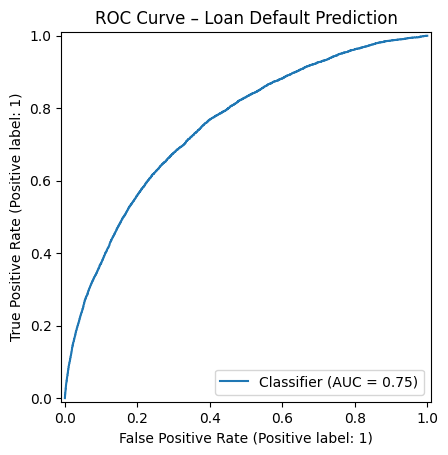

In [8]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

# Predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# ROC curve plot
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve – Loan Default Prediction")
plt.show()

In [9]:
# Copy test features and add true/pred labels
test_results = X_test.copy()
test_results['true_default'] = y_test
test_results['pred_default'] = y_pred
test_results['proba_default'] = y_proba

# Rows where the model was wrong
wrong = test_results[test_results['true_default'] != test_results['pred_default']]
print("Number of wrong predictions:", wrong.shape[0])

# Take 5 random examples to analyze in the Medium post
five_examples = wrong.sample(5, random_state=42)
five_examples

Number of wrong predictions: 5859


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,true_default,pred_default,proba_default
116085,32,19920,236895,558,9,2,22.66,36,0.41,High School,Part-time,Married,No,Yes,Other,No,0,1,0.574552
183752,43,82484,200209,387,49,2,19.92,12,0.77,High School,Self-employed,Divorced,Yes,No,Education,Yes,1,0,0.238188
174505,18,130606,187003,729,25,1,19.61,24,0.89,High School,Full-time,Divorced,Yes,Yes,Other,No,1,0,0.267787
137217,66,114370,21298,556,10,3,20.17,12,0.68,PhD,Part-time,Divorced,No,No,Home,Yes,1,0,0.046934
89447,29,26376,219146,518,22,1,5.56,24,0.56,PhD,Full-time,Married,Yes,Yes,Education,No,1,0,0.151332
